In [2]:
from dataset import *
from dataset.raw_data import air_quality_test_data, air_quality_train_data
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

/home/hoang/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
raw = air_quality_train_data("../data/data-train")
raw["input"].keys()

dict_keys(['S0000370-Ba Trieu', 'S0000229-Quan Hoa', 'S0000310-Hang Trong', 'S0000210-Truong THCS Yen So', 'S0000153-Truong Tieu hoc Tran Quoc Toan', 'S0000137-Ngoc Khanh', 'S0000541-Tran Quang Khai', 'S0000238-He thong lien cap Lomonoxop - Mam non', 'S0000143-Thu vien - DHQG Ha Noi', 'S0000171-GENESIS School', 'S0000264-FDS - Ton That Thuyet'])

# Correlation between PM2.5 and temperature

In [19]:
def correlation_table(data):
    from datetime import datetime
    from utils.functional import get_solar_term

    temp_corr = {}
    humd_corr = {}

    for st_name in data.keys():
        station = data[st_name]["data"].copy()

        if isinstance(station, pd.DataFrame):
            date = station["timestamp"].map(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M"))
            station["month"] = date.map(lambda x: x.month)
            g_station = [group for _, group in station.groupby(['month'])]

            for i in range(12):
                station_im = g_station[i]
                station_im.drop(["Unnamed: 0", "timestamp"], axis=1, inplace=True)

                corr = station_im.corr()["PM2.5"]
                if st_name not in temp_corr:
                    temp_corr[st_name] = [corr["temperature"]]
                    humd_corr[st_name] = [corr["humidity"]]
                else:
                    temp_corr[st_name].append(corr["temperature"])
                    humd_corr[st_name].append(corr["humidity"])
            
            # station["season"] = date.map(lambda x: x.month // 4)
            # station["solar_term"] = date.map(lambda x: get_solar_term(x))
            # corr[st_name] = station.corr()["PM2.5"]

    return pd.DataFrame(temp_corr), pd.DataFrame(humd_corr)

temp_corr, humd_corr = correlation_table(raw["input"])

In [20]:
temp_corr

,S0000370-Ba Trieu,S0000229-Quan Hoa,S0000310-Hang Trong,S0000210-Truong THCS Yen So,S0000153-Truong Tieu hoc Tran Quoc Toan,S0000137-Ngoc Khanh,S0000541-Tran Quang Khai,S0000238-He thong lien cap Lomonoxop - Mam non,S0000143-Thu vien - DHQG Ha Noi,S0000171-GENESIS School,S0000264-FDS - Ton That Thuyet
0,0.339210,0.371092,0.178021,0.287358,0.357712,0.392966,0.265922,0.270385,-0.046290,NaN,0.342711
1,NaN,-0.118379,-0.159979,-0.234800,-0.075097,-0.055005,-0.090580,-0.087527,-0.109471,NaN,NaN
2,NaN,-0.041706,-0.155220,-0.175775,-0.096512,-0.256401,0.043204,-0.045481,-0.113560,NaN,NaN
3,-0.291307,-0.309299,-0.416218,-0.339026,-0.396157,-0.306108,-0.299126,-0.245402,-0.248680,-0.361760,-0.225109
4,-0.116163,-0.088055,-0.219533,-0.226633,-0.226278,-0.217707,-0.209403,-0.060428,-0.246187,-0.046621,-0.216936
5,-0.013279,-0.132548,-0.036510,-0.110642,-0.148281,-0.111926,-0.198521,-0.164414,-0.216795,-0.167346,-0.172027
6,-0.272339,-0.262636,-0.301037,-0.247498,-0.348996,-0.267103,-0.317723,-0.257412,-0.243230,-0.264354,-0.237474
7,0.087641,0.017706,0.080909,0.078909,0.062912,0.107850,-0.119026,-0.103261,-0.043264,0.009122,-0.017336
8,0.167275,0.160469,0.177287,0.172821,0.055920,0.158099,0.099685,0.040074,0.214485,0.233892,0.086425
9,-0.085654,-0.170252,-0.102136,-0.120908,-0.140333,-0.057343,-0.157126,-0.337234,-0.224069,-0.125586,-0.222311


In [21]:
humd_corr

,S0000370-Ba Trieu,S0000229-Quan Hoa,S0000310-Hang Trong,S0000210-Truong THCS Yen So,S0000153-Truong Tieu hoc Tran Quoc Toan,S0000137-Ngoc Khanh,S0000541-Tran Quang Khai,S0000238-He thong lien cap Lomonoxop - Mam non,S0000143-Thu vien - DHQG Ha Noi,S0000171-GENESIS School,S0000264-FDS - Ton That Thuyet
0,0.558847,0.519442,0.410140,0.560832,0.531429,0.403867,0.556331,0.604532,0.239125,NaN,0.533466
1,NaN,0.041228,0.259246,0.277113,0.154435,0.143109,0.182337,0.199819,0.252159,NaN,NaN
2,NaN,0.352505,0.413984,0.362467,0.340233,0.285731,0.633767,0.408393,0.359220,NaN,NaN
3,0.198852,0.239000,0.257827,0.306415,0.248594,0.209042,-0.042530,0.234739,0.198743,0.465133,0.163399
4,-0.037742,-0.000914,-0.033752,0.156999,-0.061559,-0.032608,-0.071621,-0.016276,-0.144012,0.330861,0.130190
5,0.210209,0.183134,0.099474,0.110405,0.249135,0.125141,0.229460,0.186284,0.106277,-0.019339,0.204224
6,0.263971,0.268001,0.298593,0.257859,0.348300,0.258139,0.306767,0.266611,0.239622,0.277060,0.229841
7,-0.023643,0.055940,0.036234,0.008380,0.042902,-0.032618,0.219111,0.156239,0.111726,0.046325,0.104051
8,-0.094510,-0.064550,-0.084552,-0.063398,0.054867,-0.062450,-0.003312,0.032067,-0.105391,-0.160012,0.000331
9,0.090863,0.129412,-0.001582,0.007530,0.145847,0.074421,0.131609,0.229028,0.191877,0.108203,0.133861


# PM2.5 Correlation among stations

In [27]:
def corr_among_stations(data):
    corr = {}
    for st_name in data:
        station = data[st_name]["data"]

        corr[st_name] = station["PM2.5"]

    return pd.DataFrame(corr).corr()

def group_stations(data, corr: pd.DataFrame):
    arr_corr = corr.to_numpy()
    

corr_among_stations(raw["input"])

(11, 11)

# Data AutoCorrelation

In [5]:
def max_auto_corr(x: pd.Series, lim):
    x = x.interpolate(option="spline")

    corrs = []

    for lag in range(lim[0], lim[1] + 1):
        autocorr = x.autocorr(lag=lag)

        corrs.append(autocorr)

    max_corr = []

    for i in range(1, len(corrs) - 1):
        if corrs[i] > corrs[i - 1] and corrs[i] > corrs[i + 1]:
            max_corr.append(i)

    return torch.tensor(max_corr) + 1

max_auto_corr(station["PM2.5"], lim=(1, 200)) / 24

NameError: name 'station' is not defined

[]

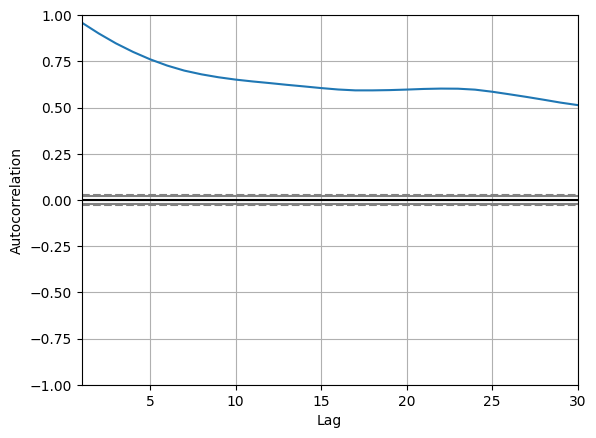

In [ ]:
x = pd.plotting.autocorrelation_plot(station["PM2.5"].dropna())
x.set_xlim([1, 30])
x.plot()